# The FIL Backend for Triton: FAQs and Advanced Features

## Introduction

This example notebook focuses on the technical details of deploying tree-based models with the FIL Backend for Triton. It is organized as a series of FAQs followed by example code providing a practical illustration of the corresponding FAQ section.

The goal of this notebook is to offer information that goes beyond the basics and provide answers to practical questions that may arise when attempting a real-world deployment with the FIL backend. If you are a complete newcomer to the FIL backend and are looking for a short introduction to the basics of what the FIL backend is and how to use it, you are encouraged to check out [this introductory notebook](https://github.com/triton-inference-server/fil_backend/blob/main/notebooks/categorical-fraud-detection/Fraud_Detection_Example.ipynb).

While we do provide training code for example models, training models is *not* the subject of this notebook, and we will provide little detail on training. Instead, you are encouraged to use your own model(s) and data with this notebook to get a realistic picture of how your model will perform with Triton.


# Table of Contents
* [Introduction](#Introduction)
* [Table of Contents](#Table-of-Contents)
* [Hardware Pre-requisites](#Hardware-Pre-Requisites)
* [Software Pre-requisites](#Software-Pre-Requisites)
* [FAQ 1: What can I deploy with the FIL Backend?](#FAQ-1:-What-can-I-deploy-with-the-FIL-backend?)
    - [FAQ 1.1 Can I deploy non-tree Scikit-Learn models like LinearRegression?](#FAQ-1.1-Can-I-deploy-non-tree-Scikit-Learn-models-like-LinearRegression?)
    - [FAQ 1.2 Can I deploy Scikit-Learn/cuML Pipelines with the FIL backend?](#FAQ-1.2-Can-I-deploy-Scikit-Learn/cuML-Pipelines-with-the-FIL-backend?)
    - [FAQ 1.3 Can I deploy Scikit-Learn/cuML models serialized with Pickle?](#FAQ-1.3-Can-I-deploy-Scikit-Learn/cuML-models-serialized-with-Pickle?)
    - [FAQ 1.4 Can I deploy Scikit-Learn/cuML models serialized with Joblib?](#FAQ-1.4-Can-I-deploy-Scikit-Learn/cuML-models-serialized-with-Joblib?)
* [Example 1: Model Serialization](#Example-1:-Model-Serialization)
    - [Example 1.1: Serializing an XGBoost model](#Example-1.1:-Serializing-an-XGBoost-model)
    - [Example 1.2 Serializing a LightGBM model](#Example-1.2-Serializing-a-LightGBM-model)
    - [Example 1.3 Serializing an in-memory Scikit-Learn model](#Example-1.3-Serializing-an-in-memory-Scikit-Learn-model)
    - [Example 1.4 Serializing an in-memory cuML model](#Example-1.4-Serializing-an-in-memory-cuML-model)
    - [Example 1.5 Converting a pickled Scikit-Learn model](#Example-1.5-Converting-a-pickled-Scikit-Learn-model)
    - [Example 1.6 Converting a pickled cuML model](#Example-1.5-Converting-a-pickled-Scikit-Learn-model)
* [FAQ 2: How do I execute models on CPU only? On GPU?](#FAQ-2:-How-do-I-execute-models-on-CPU-only?-On-GPU?)
    - [FAQ 2.1: How do I fall back to CPU only if GPUs are not available?](#FAQ-2:-How-do-I-execute-models-on-CPU-only?-On-GPU?)
* [Example 2: Generating a configuration file](#Example-2:-Generating-a-configuration-file)
* [FAQ 3: How can I quickly test configuration options?](#FAQ-3:-How-can-I-quickly-test-configuration-options?)
* [Example 3: Launching the Triton server with polling mode](#Example-3:-Launching-the-Triton-server-with-polling-mode)
* [FAQ 4: My models are exhausting Triton's memory. What can I do?](#FAQ-4:-My-models-are-exhausting-Triton's-memory.-What-can-I-do?)
    - [FAQ 4.1 How can I decrease the memory consumed by a model?](#FAQ-4.1-How-can-I-decrease-the-memory-consumed-by-a-model?)
    - [FAQ 4.2 How do I increase Triton's device memory pool?](#FAQ-4.2-How-do-I-increase-Triton's-device-memory-pool?)
* [Example 4: Configuring Triton for large models](#Example-4:-Configuring-Triton-for-large-models)
    - [Example 4.1: Changing `storage_type` to reduce memory consumption](#Example-4.1:-Changing-storage_type-to-reduce-memory-consumption)
    - [Example 4.2: Increasing Triton's device memory pool](#$\color{#76b900}{\text{Example-4.2:-Increasing-Triton's-device-memory-pool}}$)
* [FAQ 5: How do I submit an inference request to Triton?](#FAQ-5:-How-do-I-submit-an-inference-request-to-Triton?)
    - [FAQ 5.1: How do I submit inference requests through Triton's C API?](#FAQ-5.1:-How-do-I-submit-inference-requests-through-Triton's-C-API?)
    - [FAQ 5.2: How do I submit inference requests with categorical variables?](#FAQ-5.2:-How-do-I-submit-inference-requests-with-categorical-variables?)
* [Example 5: Submitting a request with the Triton Python client](#Example-5:-Submitting-a-request-with-the-Triton-Python-client)
* [FAQ 6: How do I return probability scores rather than classes from a classifier?](#FAQ-6:-How-do-I-return-probability-scores-rather-than-classes-from-a-classifier?)
* [Example 6: Using the `predict_proba` option](#Example-6:-Using-the-predict_proba-option)
* [FAQ 7: Does serving my model with Triton change its accuracy?](#FAQ-7:-Does-serving-my-model-with-Triton-change-its-accuracy?)
* [Example 7: Comparing results from Triton and native execution](#Example-7:-Comparing-results-from-Triton-and-native-execution)
* [FAQ 8: How do we measure performance of the FIL backend?](#FAQ-8:-How-do-we-measure-performance-of-the-FIL-backend?)
* [Example 8: Using perf_analyzer to measure throughput and latency](#Example-8:-Using-perf_analyzer-to-measure-throughput-and-latency)
* [FAQ 9: How can we improve performance of models deployed with the FIL backend?](#FAQ-9:-How-can-we-improve-performance-of-models-deployed-with-the-FIL-backend?)
    - [FAQ 9.1: Does specifying preferred batch sizes help FIL's performance?](#FAQ-9.1:-Does-specifying-preferred-batch-sizes-help-FIL's-performance?)
* [Example 9: Optimizing model performance](#Example-9:-Optimizing-model-performance)
    - [Example 9.1: Minimizing latency](#Example-9.1:-Minimizing-latency)
    - [Example 9.2: Maximizing Throughput](#Example-9.2:-Maximizing-Throughput)
    - [Example 9.3: Balancing latency and throughput](#Example-9.3:-Balancing-latency-and-throughput)
* [FAQ 10: How fast is the FIL backend relative to alternatives?](#FAQ-10:-How-fast-is-the-FIL-backend-relative-to-alternatives?)
    - [FAQ 10.1 How fast is the FIL backend on CPU vs on GPU?](#FAQ-10.1-How-fast-is-the-FIL-backend-on-CPU-vs-on-GPU?)
    - [FAQ 10.2 How fast is the FIL backend relative to the ONNX backend?](#FAQ-10.2-How-fast-is-the-FIL-backend-relative-to-the-ONNX-backend?)
* [Example 10: Comparing the FIL and ONNX backends](#$\color{#76b900}{\text{Example-10:-Comparing-the-FIL-and-ONNX-backends}}$)
* [FAQ 11: How do I submit many inference requests in parallel?](#FAQ-11:-How-do-I-submit-many-inference-requests-in-parallel?)
* [Example 11: Submitting requests in parallel with the Python client](#Example-11:-Submitting-requests-in-parallel-with-the-Python-client)
* [FAQ 12: How do I retrieve Shapley values for model explainability?](#$\color{#76b900}{\text{FAQ-12:-How-do-I-retrieve-Shapley-values-for-model-explainability?}}$)
* [Example 12: Retrieving Shapley Values](#$\color{#76b900}{\text{Example-12:-Retrieving-Shapley-Values}}$)
* [FAQ 13: How do I serve a learning-to-rank model?](#Example-13:-Serving-a-learning-to-rank-model-from-XGBoost)
* [Cleanup](#Cleanup)
* [Conclusion](#Conclusion)

# Hardware Pre-Requisites
Most of this notebook is designed to run either on CPU or GPU. Sections that will only run on GPU will be marked in $\color{#76b900}{\text{green}}$. To guarantee that all cells will execute correctly if a GPU is not available, change `USE_GPU` in the following cell to `False`. [^](#Table-of-Contents)

In [ ]:
USE_GPU = True

## Software Pre-Requisites

Depending on which model framework you choose to use, you may need a different subset of dependencies. In order to install *all* dependencies with conda, you can use the following environment file:

```yaml
---
name: triton_faq_nb
channels:
  - conda-forge
  - nvidia
  - rapidsai
dependencies:
  - cudatoolkit=11.4
  - cuml=22.04
  - joblib
  - jupyter
  - lightgbm
  - numpy
  - pandas
  - pip
  - python=3.8
  - scikit-learn
  - skl2onnx
  - treelite=2.3.0
  - pip:
      - tritonclient[all]
      - xgboost>=1.5,<1.6
      - protobuf==3.20.1
```
If you do not wish to install all dependencies, remove the frameworks you do not intend to use from this list. If you do not have access to an NVIDIA GPU, you should remove `cuml` and `cudatoolkit` from this list.

In addition to the above dependencies, the Triton client requires that `libb64` be installed on the system, and Docker must be available to launch the Triton server. [^](#Table-of-Contents)

# FAQ 1: What can I deploy with the FIL backend?
The first thing you will need to begin using the FIL backend is a serialized model file. The FIL backend supports **tree-based** models serialized to formats from a variety of frameworks, including the following:

## XGBoost JSON and binary models
XGBoost uses two serialization formats, both of which are natively supported by the FIL backend. All XGBoost models except for multi-output regression models are supported.
<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> Categorical variable support was added to XGBoost 1.5 as an experimental feature. The FIL backend has supported categorical variables since version 21.11.
</div>
<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> The XGBoost JSON format changed in XGBoost 1.6. The first version of the FIL backend to support these JSON changes will be 22.07.
</div>

## LightGBM text models
LightGBM's text serialization format is natively supported for all LightGBM model types except for multi-output regression models.

<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> Models trained on categorical variables have been supported since version 21.11 of the backend
</div>

## Scikit-Learn/cuML tree models and other Treelite-supported models

The FIL backend supports the following model types from Scikit-Learn/cuML:
- GradientBoostingClassifier
- GradientBoostingRegressor
- IsolationForest
- RandomForestClassifier
- RandomForestRegressor
- ExtraTreesClassifier
- ExtraTreesRegressor

Since Scikit-Learn and cuML do not have native serialization formats for these models (instead relying on e.g. Pickle), we use Treelite's checkpoint format to support these models. This also means that *any* framework that can export to Treelite's checkpoint format will be supported by the FIL backend. As part of this notebook, we will provide an example of how to save a Scikit-Learn or cuML model to a Treelite checkpoint. [^](#Table-of-Contents)

<div class="alert alert-block alert-info">
<a id='treelite-version'></a>
<b>VERSION NOTE:</b> Treelite's checkpoint format provides no forward/backward compatibility guarantees. It is therefore <b>strongly recommended</b> that you save Scikit-Learn and cuML models to Pickle so that they can be reconverted as needed. The table below shows the version of Treelite which <b>must</b> be used with each version of the FIL backend.
    
<table>
    <thead>
        <tr><th>FIL Backend Version</th><th>Treelite</th></tr>
    </thead>
    <tbody>
        <tr><td>21.08</td><td>1.3.0</td></tr>
        <tr><td>21.09-21.10</td><td>2.0.0</td></tr>
        <tr><td>21.11-22.02</td><td>2.1.0</td></tr>
        <tr><td>22.03-22.06</td><td>2.3.0</td></tr>
        <tr><td>22.07+</td><td>2.4.0</td></tr>
    </tbody>
</table>
    
</div>



### FAQ 1.1 Can I deploy non-tree Scikit-Learn models like LinearRegression?
No. The FIL backend only supports tree models and will continue to support only tree models in the future. Support for other model types may eventually be added to Triton via another backend. [^](#Table-of-Contents)

### FAQ 1.2 Can I deploy Scikit-Learn/cuML Pipelines with the FIL backend?
No. If you wish to create pipelines of different models in Triton, check out Triton's [Python backend](https://github.com/triton-inference-server/python_backend#python-backend), which allows users to connect models supported by other backends with arbitrary Python logic. [^](#Table-of-Contents)

### FAQ 1.3 Can I deploy Scikit-Learn/cuML models serialized with Pickle?
Pickle-serialized models can be converted to Treelite's checkpoint format using a script provided with the FIL Backend. This script is [documented here](https://github.com/triton-inference-server/fil_backend/blob/main/SKLearn_and_cuML.md#converting-to-treelite-checkpoints), and an example of its use will be included with this notebook. **Pickle models MUST be converted to Treelite checkpoints. They CANNOT be used directly by the FIL backend.** [^](#Table-of-Contents)

### FAQ 1.4 Can I deploy Scikit-Learn/cuML models serialized with Joblib?
JobLib-serialized models can be loaded in Python and serialized to Treelite checkpoints. At the moment, the conversion scripts for Pickle-serialized models do **not** work with Joblib, but support for Joblib will be added with a later version. **Joblib models MUST be converted to Treelite checkpoints. They CANNOT be used directly by the FIL backend.** [^](#Table-of-Contents)

# Example 1: Model Serialization

In the following example code snippets, we will demonstrate how model serialization works for each of the supported model types. In the cell below, indicate the type of model you would like to use.

If you are bringing your own model, please also provide the path to the serialized model. Otherwise, a model will be trained on random data in your selected format.

In addition to information on where and how the model is stored, we'll use the following cell to gather a bit of metadata on the model which we'll need later on including the number of features the model expects and the number of classes it outputs. If you are using a regression model, use `1` for the number of classes.

In [ ]:
# Allowed values for MODEL_FORMAT are xgboost_json, xgboost_bin, lightgbm, skl_pkl, cuml_pkl, skl_joblib,
# and treelite
MODEL_FORMAT = 'xgboost_json'

# If a path is provided to a model in the specified format, that model will be used for the following examples.
# Otherwise, if MODEL_PATH is left as None, a model will be trained and stored to a default location.
MODEL_PATH = None

# Set this value to the number of features (columns) in your dataset
NUM_FEATURES = 32

# Set this value to the number of possible output classes or 1 for regression models
NUM_CLASSES = 2

# Set this value to False if you are using your own regression model
IS_CLASSIFIER = True

## Model Training/Loading

In this section, if a model path has been provided, we will load the model so that we can compare its output to what we get from Triton later in the notebook. If a model path has **not** been provided, a model of the indicated type will be trained and serialized to a default location. We will not provide detail or commentary on training, since this is not the focus of this notebook. Consult documentation or examples for your chosen framework if you would like to learn more about the training process.

In [ ]:
RANDOM_SEED=0

In [ ]:
import pandas as pd
from sklearn.datasets import make_classification
# Create random dataset. Even if we do not use this dataset for training, we will use it for testing later.
# If you would like to use a real dataset, load it here into X and y Pandas dataframes
X, y = make_classification(
    n_samples=5000,
    n_features=NUM_FEATURES,
    n_informative=max(NUM_FEATURES // 3, 1),
    n_classes=NUM_CLASSES,
    random_state=RANDOM_SEED
)
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [ ]:
# Set model parameters for any models we need to train
NUM_TREES = 500
MAX_DEPTH = 10

In [ ]:
model = None
# XGBoost
def train_xgboost(X, y, n_trees=NUM_TREES, max_depth=MAX_DEPTH):
    import xgboost as xgb
    
    if USE_GPU:
        tree_method = 'gpu_hist'
        predictor = 'gpu_predictor'
    else:
        tree_method = 'hist'
        predictor = 'cpu_predictor'
    
    model = xgb.XGBClassifier(
        eval_metric='error',
        objective='binary:logistic',
        tree_method=tree_method,
        max_depth=max_depth,
        n_estimators=n_trees,
        use_label_encoder=False,
        predictor=predictor
    )
    
    return model.fit(X, y)

def train_lightgbm(X, y, n_trees=NUM_TREES, max_depth=MAX_DEPTH):
    import lightgbm as lgb
    
    lgb_data = lgb.Dataset(X, y)
    
    if classes <= 2:
        classes = 1
        objective = 'binary'
        metric = 'binary_logloss'
    else:
        objective = 'multiclass'
        metric = 'multi_logloss'
    training_params = {
        'metric': metric,
        'objective': objective,
        'num_class': NUM_CLASSES,
        'max_depth': max_depth,
        'verbose': -1
    }
    return lgb.train(training_params, lgb_data, n_trees)

def train_cuml(X, y, n_trees=NUM_TREES, max_depth=MAX_DEPTH):
    from cuml.ensemble import RandomForestClassifier
    model = RandomForestClassifier(
        max_depth=max_depth, n_estimators=n_trees, random_state=RANDOM_SEED
    )
    return model.fit(X, y)

def train_skl(X, y, n_trees=NUM_TREES, max_depth=MAX_DEPTH):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(
        max_depth=max_depth, n_estimators=n_trees, random_state=RANDOM_SEED
    )
    return model.fit(X, y)
    
    
if MODEL_FORMAT in ('xgboost_json', 'xgboost_bin'):
    if MODEL_PATH is not None:
        # Load model just as a reference for later
        import xgboost as xgb
        model = xgb.Booster()
        model.load_model(MODEL_PATH)
        print('Congratulations! Your model is already in a natively-supported format')
    else:
        model = train_xgboost(X, y)
elif MODEL_FORMAT == 'lightgbm':
    if MODEL_PATH is not None:
        # Load model just as a reference for later
        import lightgbm as lgb
        model = lgb.Booster(model_file=MODEL_PATH)
        print('Congratulations! Your model is already in a natively-supported format')
    else:
        model = train_lightgbm(X, y)
elif MODEL_FORMAT in ('cuml_pkl', 'skl_pkl', 'cuml_joblib', 'skl_joblib'):
    if MODEL_PATH is not None:
        if MODEL_FORMAT in ('cuml_pkl', 'skl_pkl'):
            # Load model just as a reference for later
            import pickle
            model = pickle.load(MODEL_PATH)
            print(
                "While pickle files are not natively supported, we will use a script to"
                " convert your model to a Treelite checkpoint later in this notebook."
            )
        else:
            print("Loading model from joblib file in order to convert it to Treelite checkpoint...")
            import joblib
            model = joblib.load(MODEL_PATH)
    elif MODEL_FORMAT.startswith('cuml'):
        model = train_cuml(X, y)
    elif MODEL_FORMAT.startswith('skl'):
        model = train_skl(X, y)

## The Model Repository
Triton expects models to be stored in a specific directory structure. We will go ahead and create this directory structure now and serialize our models directly into the final directory or copy the serialized model there if the trained model was provided.

Each model requires a configuration file stored in `$MODEL_REPO/$MODEL_NAME/config.pbtxt`, and a model file stored in `$MODEL_REPO/$MODEL_NAME/$MODEL_VERSION/$MODEL_FILENAME`. Note that Triton supports storing multiple versions of a model directories with different `$MODEL_VERSION` numbers starting from `1`. [^](#Table-of-Contents)

In [ ]:
import os
import shutil

MODEL_NAME = 'example_model'
MODEL_VERSION = 1
MODEL_REPO = os.path.abspath('data/model_repository')
MODEL_DIR = os.path.join(MODEL_REPO, MODEL_NAME)
VERSIONED_DIR = os.path.join(MODEL_DIR, str(MODEL_VERSION))

os.makedirs(VERSIONED_DIR, exist_ok=True)

# We will use the following variables to record information from the serialization
# process that we will require later
model_path = None
model_format = None

## Example 1.1: Serializing an XGBoost model
 [^](#Table-of-Contents)

In [ ]:
if MODEL_FORMAT == 'xgboost_json':
    # This is the default filename expected for XGBoost JSON models. It is recommended
    # that you stick with the default to avoid additional configuration.
    model_basename = 'xgboost.json'
    model_path = os.path.join(VERSIONED_DIR, model_basename)
    
    model_format = 'xgboost_json'
elif MODEL_FORMAT == 'xgboost_bin':
    # This is the default filename expected for XGBoost binary models. It is recommended
    # that you stick with the default to avoid additional configuration.
    model_basename = 'xgboost.model'
    model_path = os.path.join(VERSIONED_DIR, model_basename)
    
    # This is the format name Triton uses to indicate XGBoost binary models
    model_format = 'xgboost'

if MODEL_FORMAT.startswith('xgboost'):
    if MODEL_PATH is not None:  # Just need to copy existing file...
        shutil.copy(MODEL_PATH, model_path)
    else:
        model.save_model(model_path)  # XGB derives format from extension

## Example 1.2 Serializing a LightGBM model
 [^](#Table-of-Contents)

In [ ]:
if MODEL_FORMAT == 'lightgbm':
    # This is the default filename expected for LightGBM text models. It is recommended
    # that you stick with the default to avoid additional configuration.
    model_basename = 'model.txt'
    model_path = os.path.join(VERSIONED_DIR, model_basename)
    
    model_format = MODEL_FORMAT
    
    if MODEL_PATH is not None:  # Just need to copy existing file...
        shutil.copy(MODEL_PATH, model_path)
    else:
        model.save_model(model_path)    

## Example 1.3 Serializing an in-memory Scikit-Learn model
<a id='example_1.3'></a>The following will show how to serialize a SKL model from Python directly to a Treelite checkpoint format. This could be a model that you have just trained or a model that you have e.g. loaded from Joblib. Again it is strongly recommended that you **save trained models in Pickle/Joblib as well as Treelite** since Treelite provides no compatibility guarantees between versions. [^](#Table-of-Contents)

In [ ]:
if model is not None and MODEL_FORMAT.startswith('skl'):
    import pickle
    archival_path = os.path.join(VERSIONED_DIR, 'model.pkl')
    pickle.dump(model, archival_path)  # Create archival pickled version
    
    # This is the default filename expected for Treelite checkpoint models. It is recommended
    # that you stick with the default to avoid additional configuration.
    model_basename = 'checkpoint.tl'
    model_path = os.path.join(VERSIONED_DIR, model_basename)
    
    model_format = 'treelite_checkpoint'
    
    import treelite
    tl_model = treelite.sklearn.import_model(model)
    tl_model.serialize(model_path)

## Example 1.4 Serializing an in-memory cuML model
<a id='example_1.4'></a>The following will show how to serialize a cuML model from Python directly to a Treelite checkpoint format. This could be a model that you have just trained or a model that you have e.g. loaded from Joblib. Again it is strongly recommended that you **save trained models in Pickle/Joblib as well as Treelite** since Treelite provides no compatibility guarantees between versions. [^](#Table-of-Contents)

In [ ]:
if model is not None and MODEL_FORMAT.startswith('cuml'):
    import pickle
    archival_path = os.path.join(VERSIONED_DIR, 'model.pkl')
    pickle.dump(model, archival_path)  # Create archival pickled version
    
    # This is the default filename expected for Treelite checkpoint models. It is recommended
    # that you stick with the default to avoid additional configuration.
    model_basename = 'checkpoint.tl'
    model_path = os.path.join(VERSIONED_DIR, model_basename)
    
    model_format = 'treelite_checkpoint'
    
    model.convert_to_treelite_model().to_treelite_checkpoint(model_path)

## Example 1.5 Converting a pickled Scikit-Learn model
For convenience, the FIL backend provides a script which can be used to convert a pickle file containing a Scikit-Learn model directly to a Treelite checkpoint file. If you do not have access to that script or prefer to work directly from Python, you can always load the pickled model into memory and then serialize it as in [Example 1.3](#example_1.3). [^](#Table-of-Contents)

In [ ]:
if MODEL_PATH is not None and MODEL_FORMAT == 'skl_pkl':
    archival_path = os.path.join(VERSIONED_DIR, 'model.pkl')
    shutil.copy(MODEL_PATH, archival_path)
    
    !../../scripts/convert_sklearn {archival_path}

## Example 1.6 Converting a pickled cuML model
For convenience, the FIL backend provides a script which can be used to convert a pickle file containing a cuML model directly to a Treelite checkpoint file. If you do not have access to that script or prefer to work directly from Python, you can always load the pickled model into memory and then serialize it as in [Example 1.4](#example_1.4). [^](#Table-of-Contents)

In [ ]:
if MODEL_PATH is not None and MODEL_FORMAT == 'cuml_pkl':
    archival_path = os.path.join(VERSIONED_DIR, 'model.pkl')
    shutil.copy(MODEL_PATH, archival_path)
    
    !python ../../scripts/convert_cuml.py {archival_path}

# FAQ 2: How do I execute models on CPU only? On GPU?

In addition to a serialized model file, you must provide a `config.pbtxt` configuration file for each model you wish to serve with the FIL backend for Triton. Within that file, it is possible to specify whether a model will run on CPU or GPU and how many instances of the model you wish to serve. For example, adding the following entry to the configuration file will create one instance of the model for each available GPU and run those instances each on their own dedicated GPU:

```pbtxt
  instance_group [{ kind: KIND_GPU }]
```

If you wish to instead run exactly three instances on CPU, the following entry can be used:
```pbtxt
  instance_group [
    {
      count: 3
      kind: KIND_CPU
    }
  ]
```

In the following example, we will create a configuration file that can be used to serve your model on either CPU or GPU depending on the value of the `USE_GPU` flag set earlier in this notebook. [^](#Table-of-Contents)

<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> CPU execution was introduced with version 21.07 of the FIL backend.
</div>

## FAQ 2.1: How do I fall back to CPU only if GPUs are not available?
In addition to `KIND_GPU` and `KIND_CPU`, Triton offers a `KIND_AUTO`. To make use of this option, you must specify which GPUs you wish to make use of. If *any* of those GPUs are unavailable, Triton will fall back to CPU execution. An example of such a configuration is shown below: [^](#Table-of-Contents)
```pbtxt
  instance_group [
    {
      gpus: [ 0, 1 ]
      kind: KIND_AUTO
    }
  ]
```

# Example 2: Generating a configuration file

Based on the information provided about your model in previous cells, we can now construct a `config.pbtxt` that can be used to run that model on Triton. We will generate the configuration text and save it to the appropriate location.

For full information on configuration options, check out the FIL backend [documentation](https://github.com/triton-inference-server/fil_backend#configuration). For a detailed example of configuration file construction, you can also check out the [introductory notebook](https://nbviewer.org/github/triton-inference-server/fil_backend/blob/main/notebooks/categorical-fraud-detection/Fraud_Detection_Example.ipynb#The-Configuration-File).  [^](#Table-of-Contents)

In [ ]:
# Maximum size in bytes for input and output arrays
MAX_MEMORY_BYTES = 60_000_000
bytes_per_sample = (NUM_FEATURES + NUM_CLASSES) * 4
max_batch_size = MAX_MEMORY_BYTES // bytes_per_sample

# Select deployment hardware (GPU or CPU)
if USE_GPU:
    instance_kind = 'KIND_GPU'
else:
    instance_kind = 'KIND_CPU'
    
if IS_CLASSIFIER:
    classifier_string = 'false'
else:
    classifier_string = 'true'

config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)

# FAQ 3: How can I quickly test configuration options?
Sometimes it is useful to be able to quickly iterate on the options available in the `config.pbtxt` file for your model. While it is not recommended for production deployments, Triton offers a "polling" mode which will automatically reload models when their configurations change. To use this option, launch the server with the `--model-control-mode=poll` flag. After changing the configuration, wait a few seconds for the model to reload, and then Triton will be ready to handle requests with the new configuration. [^](#Table-of-Contents)

# Example 3: Launching the Triton server with polling mode
In the following cell, we will launch the server with the model repository we set up previously in this notebook. We will use pulling mode in order to allow us to tweak the configuration file and observe the impact of our changes. [^](#Table-of-Contents)

In [ ]:
TRITON_IMAGE = 'nvcr.io/nvidia/tritonserver:22.05-py3'
!docker run --gpus all -d -p 8000:8000 -p 8001:8001 -p 8002:8002 -v {MODEL_REPO}:/models --name tritonserver {TRITON_IMAGE} tritonserver --model-repository=/models --model-control-mode=poll

In [ ]:
import time
time.sleep(10)  # Wait for server to come up
!docker logs tritonserver

In later sections, we'll take advantage of polling mode to make tweaks to our configuration and observe their impact.

# FAQ 4: My models are exhausting Triton's memory. What can I do?
Tree-based models tend to have fairly modest memory needs, but when using several models together or when trying to process very large batches, you'll sometimes run into memory constraints.

For models deployed on GPU, Triton allocates a device memory pool when it is launched, and the FIL backend only allocates device memory from this pool, so one option is to simply increase the size of the pool until you reach hardware limits on available memory.

For models deployed on CPU or for deployments which have exceeded the hardware limits on available device memory, you may wish to instead reduce the memory consumption of models by tweaking configuration options. Let's look at this case first to showcase the polling mode introduced in the previous example. [^](#Table-of-Contents)
## FAQ 4.1 How can I decrease the memory consumed by a model?
There are two primary ways to reduce memory consumption by a FIL model:
- Reducing max batch size
- Changing the `storage_type` option to use a low-memory model representation
We will take a look at both of these options in the next example.

Note that reducing `max_batch_size` in `config.pbtxt` will only impact memory consumption if your model is receiving large enough batches to run up against this limit. Keep in mind that with Triton's dynamic batching feature, there is a distinction between *client* batch size and *server* batch size. With dynamic batching enabled, several small batches received from one or more clients can be combined into a larger server batch. The `max_batch_size` configuration option sets the maximum *server* batch that your model will receive.

For most deployments, the more consistent way to reduce model memory usage is to change the `storage_type` option. FIL gives models an in-memory representation of type `DENSE`, `SPARSE`, or `SPARSE8`, in order of progressively less memory usage. Note that using a `SPARSE` or `SPARSE8` representation can reduce a model's runtime performance and that some models will fail to load as `SPARSE8`. In general, `SPARSE8` should be avoided unless absolutely necessary for memory management.

By setting `storage_type` to `AUTO`, you allow FIL to select the memory representation that is likely to offer the best mix of runtime performance and memory footprint, but if memory consumption is a problem, explicitly setting `storage_type` to `SPARSE` will ensure that a sparse representation is used. Alternatively, if you wish to maximize runtime performance regardless of memory considerations, you may try explicitly using a `DENSE` representation. In Example 4.1, we will explicitly set the `storage_type` to `SPARSE` and then back to `AUTO`.

Note that you will not be able to observe a reduction in system GPU memory consumption (e.g. by using `nvidia-smi`) when adjusting these options, since all device memory allocations for FIL models come from Triton's pre-allocated memory pool. [^](#Table-of-Contents)

## FAQ 4.2 How do I increase Triton's device memory pool?
By default, Triton allocates a device memory pool of 67,108,864 bytes on each GPU. You can adjust this value on server startup with the `--cuda-memory-pool-byte-size` flag. Note that this flag takes arguments in the form `--cuda-memory-pool-byte-size=$GPU_ID:$BYTE_SIZE` and must be repeated for each GPU. In Example 4.2, we will take down the server and restart it with this option. [^](#Table-of-Contents)

# Example 4: Configuring Triton for large models

## Example 4.1: Changing `storage_type` to reduce memory consumption
In the following example, we generate a new configuration with `storage_type` set to `SPARSE` and write it out to `config.pbtxt`. Since we have turned on Triton's polling mode, this configuration change will automatically be picked up. [^](#Table-of-Contents)

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "SPARSE" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)

In [ ]:
time.sleep(10)  # Wait for configuration change to be processed
!docker logs tritonserver
# In the logs, we should see that example_model has been loaded and unloaded successfully
# with the new configuration

## $\color{#76b900}{\text{Example 4.2: Increasing Triton's device memory pool}}$
Now, let's take the server down entirely and bring it back up with a larger device memory pool. In the following example, specify the list of GPUs you wish to use and your desired memory pool size. Keep in mind the hardware limits of your system when specifying the pool size. [^](#Table-of-Contents)

In [ ]:
!docker rm -f tritonserver
time.sleep(10) # Wait for server to come down

In [ ]:
POOL_SIZE_BYTES = 100_663_296  # Set based on available device memory
GPU_LIST = [0, 1]  # Set based on available device IDs

In [ ]:
pool_flags = ' '.join([f'--cuda-memory-pool-byte-size={device}:{POOL_SIZE_BYTES}' for device in GPU_LIST])
print(pool_flags)

In [ ]:
!docker run --gpus all -d -p 8000:8000 -p 8001:8001 -p 8002:8002 -v {MODEL_REPO}:/models --name tritonserver {TRITON_IMAGE} tritonserver --model-repository=/models --model-control-mode=poll {pool_flags}

In [ ]:
time.sleep(10)  # Wait for server to come up
!docker logs tritonserver

# FAQ 5: How do I submit an inference request to Triton?
Triton supports both GRPC and HTTP requests, and you can use any GRPC/HTTP client to submit requests to Triton. In practice, however, it is often difficult to construct correct inference requests using a generic client, so Triton provides Python, Java, and C++ [clients](https://github.com/triton-inference-server/client#client-library-apis) to make it easier to interact with the Triton server from each of those languages. For other languages, including [Go](https://github.com/triton-inference-server/client/tree/main/src/grpc_generated/go), [Scala](https://github.com/triton-inference-server/client/tree/main/src/grpc_generated/java), and [JavaScript](https://github.com/triton-inference-server/client/tree/main/src/grpc_generated/javascript), Triton provides a protoc compiler that can generate GRPC APIs for inclusion in your application. In this notebook, we will take a look solely at how to make use of the Python client for submitting inference requests. [^](#Table-of-Contents)

## FAQ 5.1: How do I submit inference requests through Triton's C API?
In addition to its use as an HTTP/GRPC server, Triton can be used as a library within another application using its C API. Example code for this use case with the FIL backend is under development and will be linked to once complete.
 [^](#Table-of-Contents)
## FAQ 5.2: How do I submit inference requests with categorical variables?
Triton accepts input as an array of floating-point values, rather than e.g. a dataframe. In order to accept categorical values, we must convert them to floating-point representations of the categorical codes used in training.

Just as with most frameworks that accept categorical variables, a certain amount of care must be taken to ensure that the same categorical codes are used during inference as during training. For instance, if you trained your model using a dataframe with ten possible categorical values in a particular column, but the data you submit at inference time has only two of the ten possible values, Pandas/cuDF may assign different categorical codes from those used during training, leading to incorrect results. Therefore, it is important to keep some record of the categories used during training to correctly construct an input array. In this example, we will demonstrate how to convert categorical values to their floating point representation using the categorical codes provided by Pandas/cuDF. [^](#Table-of-Contents)

## FAQ 5.3: Should I use any name besides `input__0` and `output__0` for inputs/outputs to the FIL backend?
**No.** Unless you are using the FIL backend's Shapley value output feature (described later), the sole input array should *always* be named `input__0`, and the sole output array should *always* be named `output__0`. [^](#Table-of-Contents)

# Example 5: Submitting a request with the Triton Python client
In the following example, we first use the Triton Python client to ensure that the server is live and the model is ready to accept requests. We then submit a single request and view the result as a numpy array. Next, we submit a larger batch of requests and examine the results. [^](#Table-of-Contents)

In [ ]:
# Create GRPC client instance
import time
import tritonclient.grpc as triton_grpc
from tritonclient import utils as triton_utils

# If you are running your Triton server on a remote host or a non-standard port, adjust the
# following settings
HOST = 'localhost'
PORT = 8001

# TIMEOUT sets the time in seconds that we will wait for the server to be ready before giving
# up
TIMEOUT = 60

client = triton_grpc.InferenceServerClient(url=f'{HOST}:{PORT}')

In [ ]:
# Check to see if server is live and model is loaded
def is_triton_ready():
    server_start = time.time()
    while True:
        try:
            if client.is_server_ready() and client.is_model_ready(MODEL_NAME):
                return True
        except triton_utils.InferenceServerException:
            pass
        if time.time() - server_start > TIMEOUT:
            print('Server was not ready before given timeout. Check the logs below for possible issues.')
            !docker logs tritonserver
            return False
        time.sleep(1)

In [ ]:
# Convert a dataframe to a numpy array including conversion of categorical variables
def convert_to_numpy(df):
    df = df.copy()
    cat_cols = df.select_dtypes('category').columns
    for col in cat_cols:
        df[col] = df[col].cat.codes
    for col in df.columns:
        df[col] =  pd.to_numeric(df[col], downcast='float')
    return df.values

In [ ]:
single_sample = convert_to_numpy(X[0:1])
print(single_sample)

In [ ]:
def triton_predict(model_name, arr):
    triton_input = triton_grpc.InferInput('input__0', arr.shape, 'FP32')
    triton_input.set_data_from_numpy(arr)
    triton_output = triton_grpc.InferRequestedOutput('output__0')
    response = client.infer(model_name, model_version='1', inputs=[triton_input], outputs=[triton_output])
    return response.as_numpy('output__0')

In [ ]:
# Perform inference on a single sample (row)
if is_triton_ready():
    triton_result = triton_predict(MODEL_NAME, single_sample)
    print(triton_result)

In [ ]:
# Perform inference on a batch
if is_triton_ready():
    batch = convert_to_numpy(X[0:min(len(X), max_batch_size, 100)])
    triton_result = triton_predict(MODEL_NAME, batch)
    print(triton_result)

# FAQ 6: How do I return probability scores rather than classes from a classifier?
To return confidence scores from 0 to 1 rather than just a final output class, we set the `predict_proba` option to `true` in `config.pbtxt`. Note that for multi-class classifiers, we also need to change the output dimensions, since a confidence score will be generated for each possible class in our output. For single-class classifiers, the output dimension is still 1, since we return the confidence score only for the positive class. In the following example, we adjust these options and perform inference on a single sample once again to demonstrate the change in output. [^](#Table-of-Contents)

# Example 6: Using the `predict_proba` option
<div class="alert alert-block alert-warning">
    <b>Note:</b> This example is not relevant for regression models.
</div>

In the following example, we will write out a new configuration file with `predict_proba` set to true and the correct output dimensions. We will wait for the change to be picked up by the server's polling feature and then submit an inference request to the model as we did before. [^](#Table-of-Contents)

In [ ]:
if NUM_CLASSES <= 2:
    output_dim = 1
else:
    output_dim = NUM_CLASSES

config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ {output_dim} ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "true" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }}
]

dynamic_batching {{}}"""

if IS_CLASSIFIER:
    config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
    with open(config_path, 'w') as file_:
        file_.write(config_text)

In [ ]:
time.sleep(10)  # Wait for server polling to reload the changed config
if is_triton_ready():
    batch = convert_to_numpy(X[0:min(len(X), max_batch_size, 100)])
    triton_result = triton_predict(MODEL_NAME, batch)
    print(triton_result)

# FAQ 7: Does serving my model with Triton change its accuracy?
In general, no. Models served with Triton's FIL backend are loaded and executed according to the exact same rules as their native frameworks. However, inference with FIL is subject to floating point error, and the highly-parallel nature of FIL means that there may be slight differences in results between inference runs. If a confidence score is close to the decision threshold, this may even impact the output class reported for the model, so it is recommended to set `predict_proba` on if you are comparing model output on Triton vs. local execution.

Additionally, LightGBM allows training and execution of models with double precision, while FIL currently uses single precision for all models. An update is under development to allow double precision execution, but for now, this may lead to slight differences in output between double precision models in their native framework and the same model loaded in the FIL backend.

Regardless, these differences tend to be very marginal, and even with these caveats you can expect approximately the same accuracy for your model when served with Triton. [^](#Table-of-Contents)

# Example 7: Comparing results from Triton and native execution
In the following example, we obtain results from both Triton and from our local copy of the model. We compare these results and demonstrate that they are the same to within the differences we might expect from floating-point error. [^](#Table-of-Contents)

In [ ]:
# Obtain results from native framework
batch = X[0:min(len(X), max_batch_size, 100)]
native_result = model.predict_proba(batch)
print("Output from native framework:")
if IS_CLASSIFIER and NUM_CLASSES <= 2 and len(native_result.shape) == 2 and native_result.shape[1] == 2:
    native_result = native_result[:, 1]
print(native_result)

In [ ]:
# Obtain results from Triton
if is_triton_ready():
    numpy_batch = convert_to_numpy(batch)
    triton_result = triton_predict(MODEL_NAME, numpy_batch)
    print("Output from Triton:")
    print(triton_result)

In [ ]:
# Compare results and compute maximum absolute difference for any output entry
import numpy as np
max_diff = np.max(np.abs(triton_result - native_result))
print(f'The maximum absolute difference between the Triton and native output is {max_diff}')

# FAQ 8: How do we measure performance of the FIL backend?
For practical purposes, there are two numbers we generally care about when considering the performance of an inference server like Triton: **throughput** and **latency**. Throughput gives a measure of how many samples (rows) can be processed in a given interval, while latency gives a measure of how long a client will have to wait after sending a request before it receives a response.

Depending on your specific application, throughput or latency may have a higher or lower priority. Imagine that you are developing an application to analyze credit card transactions for potential fraud and stop suspected fraudulent transactions before they can go through. In such cases, latency is extremely important because a fraud/non-fraud determination must be made before a response can be sent to the point-of-sale. If the latency is too high, you may not be able to make a determination before the transaction has been processed.

On the other hand, imagine that you are developing an application to *retroactively* process all credit card transactions cleared in a day and look for fraudulent transactions that might already have occurred. In this case, throughput is the most important performance metric, since all we care about is the rate at which we can process the entire batch of daily transactions.

As another way of thinking about this tradeoff, latency generally determines the *responsiveness* of your application, while throughput determines the *compute cost*. With higher throughput, you will be able to process more total samples in a shorter period of time, which means that you can use fewer instances to handle required traffic. With lower latency, you will be able to quickly return responses, but you may need more instances to handle the volume of traffic you expect.

The FIL backend and Triton itself offer a range of configuration options to allow you to achieve exactly the right balance of throughput and latency for your application. We will go through a few of them in the following sections. For each option we consider, we will make use of Triton's `perf_analyzer` [tool](https://github.com/triton-inference-server/server/blob/main/docs/perf_analyzer.md#performance-analyzer) which allows us to measure latency and throughput with a variety of configuration options. [^](#Table-of-Contents)

# Example 8: Using `perf_analyzer` to measure throughput and latency

Triton's `perf_analyzer` offers a huge number of options that allow you to simulate real deployment conditions and measure both throughput and latency. In this example, we will focus on just a few of these options that will help us to assess overall performance of models deployed with the FIL backend.

In [ ]:
# The simplest invocation of perf_analyzer, submitting one sample at a time
!perf_analyzer -m {MODEL_NAME}

In the above output, we see the throughput in inferences/second (equivalently samples/second or rows/second) and the latency in microseconds. Several different latency scores are reported, including the average latency and p99 latency (the latency of the request in the 99th percentile of recorded latencies). Often, service level agreements are established around a particular latency percentile, so you can see the value which is most relevant to your application.

While this gives us a starting point for understanding our model's performance, other factors can play into both throughput and latency. Let's see what happens when we switch from the default HTTP to GRPC

In [ ]:
!perf_analyzer -m {MODEL_NAME} -i GRPC

Depending on your model, this may or may not have had much effect on the measured performance, but generally, Triton gets slightly better performance over GRPC than HTTP. Let's now look at what happens when we increase our client batch size from 1 to 16:

In [ ]:
!perf_analyzer -m {MODEL_NAME} -i GRPC -b 16

Depending on your model, throughput likely went up, but latency may have gone up as well. If you have the option of doing client-side batching in your application, exploring possible batch sizes with `perf_analyzer` can help you find the right balance of latency and throughput. In general, you should not be afraid to consider very large batch sizes when running FIL on the GPU. FIL offers throughput benefits for batches consisting even of millions of rows, but latency may suffer due to the overhead of transferring such large arrays over the network.

While client-side batching is not always an option, we can take advantage of Triton's dynamic batching feature to combine many small client-side batches into a larger server batch. Let's use `perf_analyzer`'s `--concurrency-range` option to see what happens when many small concurrent requests are submitted to the server at once. As the name of the flag implies, it is generally used to explore a *range* of concurrencies, but here we will use it just to explore a single higher concurrency value

In [ ]:
!perf_analyzer -m {MODEL_NAME} -i GRPC --concurrency-range 16:16

There is some additional work required to combine these small batches and distribute responses, so the measured performance is likely somewhat worse than when we were doing a similar amount of batching client-side. Nevertheless, throughput likely increased relative to our original run, demonstrating the potential value of Triton's dynamic batching feature. [^](#Table-of-Contents)

# FAQ 9: How can we improve performance of models deployed with the FIL backend?

A number of factors impact the throughput and latency we can expect for models deployed on the FIL backend including:
- The complexity of the model
- Whether GPUs or CPUs are used for inference
- Client batch size
- Whether or not Triton's dynamic batching feature is used
- Whether or not Triton's shared memory mode is used
- Whether HTTP or GRPC is used
- On CPU:
    * The `use_experimental_optimizations` flag in `config.pbtxt`
- On GPU:
    * The `storage_type` option in `config.pbtxt`
    * The `transfer_threshold` option in `config.pbtxt`
    * The `algo` option in `config.pbtxt` (advanced feature)
    * The `blocks_per_sm` option in `config.pbtxt` (advanced feature)
    * The `threads_per_tree` option in `config.pbtxt` (advanced feature)

Making the correct choice for each of these depends on your model, hardware configuration and on whether you are prioritizing latency, throughput, or some combination of both. In the following examples, we will first look at a case where we are prioritizing latency above all else. Then we will look at ways to maximize throughput, and finally we will try to find a good balance of both. [^](#Table-of-Contents)

## FAQ 9.1: Does specifying preferred batch sizes help FIL's performance?
Triton allows specification of "preferred" batch sizes in the configuration of its dynamic batching feature, but this does **not** offer any benefit to performance of models deployed with the FIL backend. While there are theoretically extremely marginal performance benefits at specific batch sizes, the actual model evaluation in FIL is fast enough that waiting for a specific batch size instead of proceeding immediately with whatever input data is available is counterproductive. [^](#Table-of-Contents)

# Example 9: Optimizing model performance

## Example 9.1: Minimizing latency
<div class="alert alert-block alert-warning">
    <b>WARNING:</b> Using the configuration we consider here is NOT recommended for any sort of production deployment, unless your application <b>truly</b> requires minimal latency down to the microsecond and you have either extremely light traffic or the ability to scale out onto a very large number of instances.
</div>

In this example, we will focus on minimizing latency at all costs. In reality, there is a point of diminishing returns at which substantially higher throughput can be achieved by adding just a few microseconds to latency, but we will take the extreme case here to illustrate all the ways you can reduce latency for your model.

Note that by taking these steps, you will likely have to invest in more compute instances to handle total incoming traffic. Taken to extremes, a minimal latency configuration could have a dedicated instance for each client, so look to Example 9.3 for a more balanced approach.

### Step 1: Minimize batch size
If all we care about is achieving the lowest possible latency, we will want to ensure that data is processed in as small of batches as possible. To do this, we will turn off Triton's dynamic batching feature by removing the `dynamic_batching` entry from `config.pbtxt` and submit client batches of size 1. Note that doing this will substantially impact our ability to handle high server traffic unless we scale out to more compute instances.

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }}
]
"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

### Step 2: Use shared memory mode (if possible)
In the rare case that your input data is coming from the same machine that is making requests, you can substantially improve performance (both throughput and latency) by using Triton's shared memory mode. In this mode, rather than transferring the entirety of an input array over the network, the data are loaded into memory by the client, and then Triton is provided with a pointer to that data in memory.

Usually, input requests do not originate from the server, so this option is not always possible. Nevertheless, let's take a look at this option with `perf_analyzer`, in part to get a sense of how much overhead is due to network transfer of the input array.

<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> Prior to version 21.07, a bug resulted in incorrect results when CUDA shared memory mode was used with a model deployed on CPU. It is generally not recommended that you use CUDA shared memory mode with a CPU-deployed model prior to version 21.11.
</div>

In [ ]:
if is_triton_ready():
    if USE_GPU:
        !perf_analyzer -m {MODEL_NAME} -i GRPC --shared-mem=cuda
    else:
        !perf_analyzer -m {MODEL_NAME} -i GRPC --shared-mem=host

For our remaining experiments in this example, we will **not** make use of shared memory.

### Step 3: Activate experimental CPU optimizations
For simple enough models we can sometimes achieve better minimum latency on CPU than on GPU because we can avoid the overhead of transferring data from host to device and back again. Whether this offers benefit for any particular application depends significantly on the model and on your available hardware (both CPU and GPU). Regardless, if minimizing latency is essential, you will want to set the `use_experimental_optimizations` flag to `true` in order to obtain the best possible CPU performance.

This flag uses an alternate CPU inference method with substantially improved performance. Despite the name of the flag, this method is quite stable and will become the default CPU execution path in future versions of the FIL backend. Let's try activating this mode now, switching to CPU execution, and looking at the impact on latency.

<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> This option was added in version 22.04. Version 22.03 did not offer the use_experimental_optimizations flag, but it did include some CPU optimizations relative to earlier versions. Prior to version 22.03, CPU execution was not at all optimized. If you are using a version of Triton before 22.03, GPU execution should be used for optimal performance (both throughput and latency).
</div>

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: KIND_CPU }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }},
  {{
    key: "use_experimental_optimizations"
    value: {{ string_value: "true" }}
  }}
]
"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

In [ ]:
if is_triton_ready():
    !perf_analyzer -m {MODEL_NAME} -i GRPC

The impact of this change will depend on the complexity of your model and on your available CPU/GPU hardware, but you are likely to see a modest improvement in latency and a slight decline in throughput. [^](#Table-of-Contents)

## Example 9.2: Maximizing Throughput
We now turn to the opposite extreme and attempt to maximize throughput without any consideration for latency. While the absolute-minimum latency configuration rarely makes sense, there are many applications for which latency can be arbitrarily high. If you are batch-processing a large volume of data without real-time client interaction, throughput is likely to be the only reblevant metric.

### $\color{#76b900}{\text{Step 1: Use GPU execution}}$
Maximum throughput for any model deployed with the FIL backend will be substantially higher on GPU than on CPU. In fact, this increased throughput more than offsets the increased per-hour cost of most GPU cloud instances, resulting in cost savings of around 50% for many typical model deployments relative to CPU execution.

### Step 2: Use dynamic batching
By combining many small requests from clients into one large server-side batch, we can take maximal advantage of the highly-optimized parallel execution of FIL.

### Step 3: Increase client-side batch size (if possible)
If your application allows it, increasing the size of client batches can further increase performance by avoiding the overhead of combining input data and scattering output data.

### $\color{#76b900}{\text{Step 4: Try storage_type DENSE (if possible)}}$
If you have enough memory available, switching to a `storage_type` of `DENSE` *may* improve performance. This is model-dependent, however, and the impact may be small. We will not attempt this here, since you may be working with a model that would not fit in memory with a dense representation.

### $\color{#76b900}{\text{Step 5 (Advanced): Experiment with algo options}}$
We can use this configuration option to explicitly specify how FIL will lay out its trees and progress through them during inference. The following options are available:
- `ALGO_AUTO`
- `NAIVE`
- `TREE_REORG`
- `BATCH_TREE_REORG`
It is difficult to say *a priori* which option will be most suitable for your model and deployment configuration, so `ALGO_AUTO` is generally a safe choice. Nevertheless, we will demonstrate the `TREE_REORG` option, since it provided about a 10% improvement in throughput for the model used while testing this notebook.

<div class="alert alert-block alert-warning">
    <b>NOTE:</b> Only ALGO_AUTO and NAIVE can be used with storage_type SPARSE or SPARSE8
</div>

### $\color{#76b900}{\text{Step 6 (Advanced): Experiment with the blocks_per_sm option}}$
This option lets us explicitly set the number of CUDA blocks per streaming multiprocessor that will be used for the GPU inference kernel. For very large models, this can improve the cache hit rate, resulting in a modest improvement in performance. To experiment with this option, set it to any value between 2 and 7.

As with `algo` selection, it is difficult to say what the impact of tweaking this option will be. In the model used while testing this notebook, no value offered better performance than the default of 0, which allows FIL to select the blocks per SM via a different method.

### $\color{#76b900}{\text{Step 7 (Advanced): Experiment with the threads_per_tree option}}$
This option lets us increase the number of CUDA threads used for inference on a single tree above 1, but it results in increased shared memory usage. Because of this, we will not experiment with this value in this notebook.


Combining all of these options, let's write out a new configuration file and observe the impact on throughput with `perf_analyzer`. [^](#Table-of-Contents)

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }},
  {{
    key: "algo"
    value: {{ string_value: "TREE_REORG" }}
  }},
  {{
    key: "blocks_per_sm"
    value: {{ string_value: "0" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

In [ ]:
if is_triton_ready():
    !perf_analyzer -m {MODEL_NAME} -i GRPC -b {max_batch_size}

### Step 8: Increase concurrency with a slightly smaller client batch size
Because of the overhead of transferring large input arrays over the network, it can sometimes be beneficial to submit arrays of a size less than the maximum batch size but to do so at higher concurrency. This allows the FIL backend to begin working on a batch while network transfer continues, effectively "overlapping" data transfer and processing. Let's take a look at what happens when we submit batches of half the size we were before but with higher concurrency.

In [ ]:
# First submit batches of maximum size at concurrency 16
!perf_analyzer -m {MODEL_NAME} -i GRPC -b {max_batch_size} --concurrency-range 16:16

In [ ]:
# Now submit batches of half the maximum size at the same concurrency
half_max_batch_size = max_batch_size // 2
!perf_analyzer -m {MODEL_NAME} -i GRPC -b {half_max_batch_size} --concurrency-range 16:16

Depending on your model, this may or may not have improved throughput, but in general there is some optimal client batch size below the maximum server batch size that allows for increased throughput while *also* reducing latency. This technique is so valuable we will revisit it in more detail in FAQ 11, where we will demonstrate how to do this with the Python client. [^](#Table-of-Contents)

## Example 9.3: Balancing latency and throughput
Let's now imagine a somewhat more typical scenario, where rather than working toward absolute minimal latency or absolute maximum throughput, we have some latency budget and are looking to maximize throughput within that latency budget.

Let's imagine that we have a p99 latency budget of 2 ms. We will start by writing out a configuration that makes use of features we explored in examples 9.1 and 9.2, then we will use `perf_analyzer` to see how our model will perform under various deployment scenarios.

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }},
  {{
    key: "algo"
    value: {{ string_value: "TREE_REORG" }}
  }},
  {{
    key: "blocks_per_sm"
    value: {{ string_value: "0" }}
  }},
  {{
    key: "use_experimental_optimizations"
    value: {{ string_value: "true" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

Let's assume for the moment that we must hold our client batch size fixed to just 1. Using `perf_analyzer`, we can explore a range of concurrencies to see how well our server will handle increasing amounts of traffic for the model. Using the `--binary-search` flag, we can perform a binary search over a range of concurrencies to find the highest value that does not exceed our 2 ms p99 latency budget (set with the `-l` flag).

In [ ]:
if is_triton_ready():
    # Find the highest concurrency between 1 and 16 that does not exceed 2ms p99 latency
    !perf_analyzer -m {MODEL_NAME} -i GRPC --binary-search --percentile 99 --concurrency-range 1:16 -l 2

For the model and hardware used to test this notebook, a concurrency of 8 was the highest we could go for the given p99 latency budget. This gives us a sense of how many concurrent requests our model can handle without threatening our latency target.

Now, let's assume that we *can* increase client batch size. Can we set the client batch size at the given concurrency and still stay under our 2 ms p99 latency target? There is no batch size search option for `perf_analyzer`, but we can simply experiment with a range of batch sizes in the following invocation.

In [ ]:
if is_triton_ready():
    !perf_analyzer -m {MODEL_NAME} -i GRPC --concurrency-range 8:8 -b 3

For the model and hardware used to test this notebook, we could increase the client batch size to 3 without meaningfully changing the p99 latency, thereby tripling our throughput. By exploring these kinds of tradeoffs with `perf_analyzer`, you can find a balance of throughput and latency which meets your latency budget but which also maximizes throughput (and therefore minimizes compute costs). [^](#Table-of-Contents)

# FAQ 10: How fast is the FIL backend relative to alternatives?
There are relatively few inference servers which offer support for tree-based models, so it is somewhat difficult to find a useful point of comparison. Sometimes, users ask for a comparison of the FIL backend's performance to e.g. native XGBoost performance, but because XGBoost does not offer an inference *serving* solution, it is very difficult to create an apples-to-apples comparison.

What we can do is compare the underlying FIL execution library directly to the underlying XGBoost library without invoking Triton as a server. In the following chart, we see this comparison for a fairly typical XGBoost model of moderate complexity. For this benchmark, GPU execution took place on a single A100 provided via a GCP a2 instance. CPU execution took place on a GCP n2-standard-16 instance.
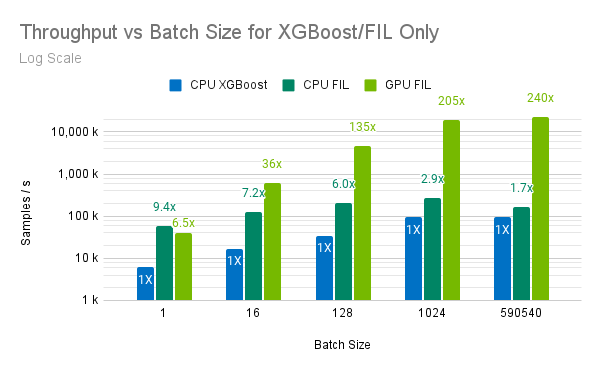

As we can see, FIL significantly outperforms CPU XGBoost at small batch sizes and more dramatically outperforms it on GPU for higher batch sizes. [^](#Table-of-Contents)

## FAQ 10.1 How fast is the FIL backend on CPU vs on GPU?

Naturally, the answer to this question depends on the CPU and GPU hardware you have available. To give a sense of the typical performance differential one might expect, however, we present throughput-latency curves on CPU and GPU for a typical XGBoost model below. For this benchmark, GPU execution took place on a single A100 provided via a GCP a2 instance. CPU execution took place on a GCP n2-standard-16 instance.
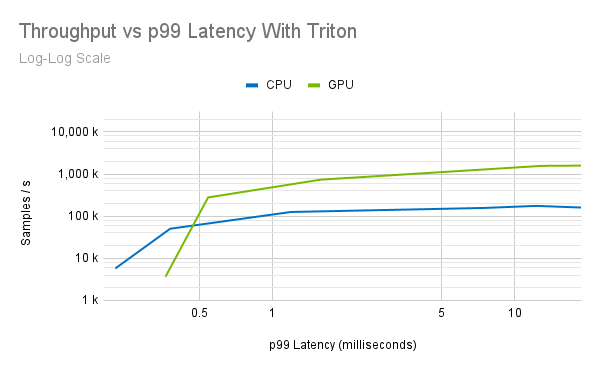

In the very low latency domain (small batch size, light server traffic), we see that CPU execution can outperform GPU, but above around half a millisecond latency (slightly larger batches or increased traffic), GPU clearly dominates. [^](#Table-of-Contents)

## FAQ 10.2 How fast is the FIL backend relative to the ONNX backend?

While analysis of the underlying library is a useful starting place for understanding the performance of the FIL backend, it does not provide an entirely satisfactory point of comparison, since it does not provide a direct comparison of latency/throughput achievable on FIL vs another solution.

Triton does offer one other backend that supports *some* tree-based models, however. Using ONNX, we can get a more direct sense of how the FIL backend performs in an end-to-end comparison. In example 10, we will compare performance of a Scikit-Learn model when deployed with the FIL backend to the same model deployed with the ONNX backend and demonstrate that the FIL backend generally significantly outperforms ONNX on GPU. [^](#Table-of-Contents)


<div class="alert alert-block alert-warning">
    <b>NOTE:</b> We have restricted the following example to GPU execution because the relative CPU performance of ONNX vs FIL varies on a wide enough range of factors to make it difficult to draw generally-applicable conclusions. This topic will be covered separately elsewhere. CPU optimizations continue to be a focus for FIL backend development, and we expect its performance to continue to improve in areas where it currently underperforms the ONNX backend. For more details, see <a href="https://github.com/triton-inference-server/fil_backend/issues/168#issuecomment-1076895114">this Github issue</a>.
</div>

## $\color{#76b900}{\text{Example 10: Comparing the FIL and ONNX backends}}$

For this example, we will abandon our current example model and instead train up a Scikit-Learn RandomForestClassifier. This model can be converted to ONNX using the skl2onnx package. While *some* XGBoost models can also be converted to ONNX in a similar way, there is often difficulty with matching versions of each of the relevant packages, so we will stick to Scikit-Learn for the moment. We will then deploy the model using both the FIL and ONNX backends and compare their performance using `perf_analyzer`.


<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> Remember that when using Scikit-learn models, the version of Treelite used for serialization must match that used in the Triton server version you are using. See the <a href=#treelite-version>compatibility table</a> above for info on which Treelite version is required.
</div>

In [ ]:
# Train model
if USE_GPU:
    skl_model = train_skl(X, y, n_trees=5)

In [ ]:
# Serialize model to Triton model repo and write out config file for FIL
if USE_GPU:
    import treelite

    fil_name = 'fil_model'
    fil_dir = os.path.join(MODEL_REPO, fil_name)
    fil_versioned_dir = os.path.join(fil_dir, '1')

    os.makedirs(fil_versioned_dir, exist_ok=True)

    fil_path = os.path.join(fil_versioned_dir, 'checkpoint.tl')

    tl_model = treelite.sklearn.import_model(skl_model)
    tl_model.serialize(fil_path)

    config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "treelite_checkpoint" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "true" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "SPARSE" }}
  }},
  {{
    key: "algo"
    value: {{ string_value: "ALGO_AUTO" }}
  }},
  {{
    key: "blocks_per_sm"
    value: {{ string_value: "0" }}
  }},
  {{
    key: "use_experimental_optimizations"
    value: {{ string_value: "true" }}
  }}
]

dynamic_batching {{}}"""

    config_path = os.path.join(fil_dir, 'config.pbtxt')
    with open(config_path, 'w') as file_:
        file_.write(config_text)

In [ ]:
# Serialize model to Triton model repo and write out config file for ONNX

if USE_GPU:
    from skl2onnx import convert_sklearn
    from skl2onnx.common.data_types import FloatTensorType
    onnx_name = 'onnx_model'
    onnx_dir = os.path.join(MODEL_REPO, onnx_name)
    onnx_versioned_dir = os.path.join(onnx_dir, '1')

    os.makedirs(onnx_versioned_dir, exist_ok=True)

    onnx_path = os.path.join(onnx_versioned_dir, 'model.onnx')

    onnx_model = convert_sklearn(
        skl_model,
        initial_types=[('input', FloatTensorType([None, NUM_FEATURES]))],
        target_opset=12,
        options={'zipmap': False}
    )
    outputs = {output.name: output for output in onnx_model.graph.output}
    onnx_model.graph.output.remove(outputs['label'])
    with open(onnx_path, 'wb') as file_:
        file_.write(onnx_model.SerializeToString())

    config_text = f"""platform: "onnxruntime_onnx",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "probabilities"
    data_type: TYPE_FP32
    dims: [ 2 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "intra_op_thread_count"
    value: {{ string_value: "8" }}
  }},
  {{
    key: "cudnn_conv_algo_search"
    value: {{ string_value: "1" }}
  }}
]

dynamic_batching {{}}"""

    config_path = os.path.join(onnx_dir, 'config.pbtxt')
    with open(config_path, 'w') as file_:
        file_.write(config_text)

    time.sleep(10)

Now, let's use `perf_analyzer` to see how each of these models perform under a bit of traffic.

In [ ]:
if USE_GPU and is_triton_ready():
    !perf_analyzer -m {fil_name} -i GRPC --concurrency-range 16:16
    !perf_analyzer -m {onnx_name} -i GRPC --concurrency-range 16:16

Your exact results will depend on available hardware, but on the GPU used to test this notebook, we see that FIL offers about 5x the throughput with about 5x better average latency and about 20x better p99 latency. As server load and client batch size grow, FIL's relative advantage over ONNX in both throughput and latency continue to increase. [^](#Table-of-Contents)

In [ ]:
if USE_GPU and is_triton_ready():
    !perf_analyzer -m {fil_name} -i GRPC --concurrency-range 16:16 -b 128
    !perf_analyzer -m {onnx_name} -i GRPC --concurrency-range 16:16 -b 128

# FAQ 11: How do I submit many inference requests in parallel?
Because of the overhead of transferring an input array over the network, it is possible to achieve a significant performance improvement by submitting multiple requests in parallel. In this way, network transfer overlaps with inference, and the model can begin processing some samples while others are still being transferred.

In the following example, we will make use of the `async_infer` method of the Triton Python client to break a large batch up into chunks and submit them concurrently. Correctly selecting a chunk size that results in improved performance depends on a number of factors. It is often best to proceed empirically, testing a range of chunks to find an optimum for your application. [^](#Table-of-Contents)

# Example 11: Submitting requests in parallel with the Python client
In this example, we will try processing a number of samples equal to the selected `max_batch_size` in two different ways. In the first, we will submit the entire dataset at once. In the second, we will break the dataset into 5 chunks and submit them asynchronously. In each case, we will look at how long it took to process the entire dataset.

The results of this experiment will vary depending on hardware and your model details, so you may try experimenting with the number of chunks to find an optimum for your deployment.

In [ ]:
NUM_CHUNKS = 5

In [ ]:
import concurrent.futures

def triton_predict_async(model_name, arr):
    triton_input = triton_grpc.InferInput('input__0', arr.shape, 'FP32')
    triton_input.set_data_from_numpy(arr)
    triton_output = triton_grpc.InferRequestedOutput('output__0')
    
    future_result = concurrent.futures.Future()
    
    def callback(result, error):
        if error is None:
            future_result.set_result(result.as_numpy('output__0'))
        else:
            future_result.set_exception(error)
    
    client.async_infer(
        model_name,
        model_version='1',
        inputs=[triton_input],
        outputs=[triton_output],
        callback=callback
    )
    return future_result

In [ ]:
large_input = np.random.rand(max_batch_size, NUM_FEATURES).astype('float32')
chunks = np.array_split(large_input, NUM_CHUNKS)

In [ ]:
%%timeit
triton_predict(MODEL_NAME, large_input)

In [ ]:
%%timeit
concurrent.futures.wait([triton_predict_async(MODEL_NAME, chunk_) for chunk_ in chunks])

Again, your results may vary depending on hardware and model, but for the configuration used while testing this notebook, splitting the data into 5 chunks in order to overlap transfer and data processing resulted in an approximately 2x speedup. [^](#Table-of-Contents)

# $\color{#76b900}{\text{FAQ 12: How do I retrieve Shapley values for model explainability?}}$

The FIL backend allows models to return [Shapley values](https://en.wikipedia.org/wiki/Shapley_value) for each feature in order to explain which features were most important in the model's decision. By configuring the model with an extra output, we will get Shapley values along with the main prediction output. This extra output must have the name `treeshap_output`, and its size should be equal to the number of features plus one, where the final extra column stores a "bias" term.

Because of the increased latency from transferring such a large output array, always computing and returning Shapley values may have an undesirable impact on latency. When model explainability is required however, this additional output can provide powerful insight on how your model comes to its decisions for any given input. [^](#Table-of-Contents)


<div class="alert alert-block alert-info">
<b>VERSION NOTE:</b> GPU Shapley value support was added with version 22.03 of the FIL backend.
</div>
<div class="alert alert-block alert-warning">
    <b>NOTE:</b> Experimental support for CPU Shapley values has been added in version 23.04.
</div>

# $\color{#76b900}{\text{Example 12: Retrieving Shapley Values}}$
In order to have the FIL backend compute and return Shapley values, we simply add an additional output to the `config.pbtxt` file for that model with the correct number of dimensions. For instance, if our model has 500 input features, we would add the following output entry:

```pbtxt
 {
    name: "treeshap_output"
    data_type: TYPE_FP32
    dims: [ 501 ]
  }
```

Let's try this now with our example model.

In [ ]:
shap_dim = NUM_FEATURES + 1

config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }},
 {{
    name: "treeshap_output"
    data_type: TYPE_FP32
    dims: [ {shap_dim} ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "predict_proba"
    value: {{ string_value: "false" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "{classifier_string}" }}
  }},
  {{
    key: "threshold"
    value: {{ string_value: "0.5" }}
  }},
  {{
    key: "storage_type"
    value: {{ string_value: "AUTO" }}
  }},
  {{
    key: "algo"
    value: {{ string_value: "TREE_REORG" }}
  }},
  {{
    key: "blocks_per_sm"
    value: {{ string_value: "0" }}
  }},
  {{
    key: "use_experimental_optimizations"
    value: {{ string_value: "true" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

To make use of this new output, we will need to slightly adjust how we use the Python client to submit requests. The following function will allow us to retrieve the Shapley values in addition to the usual model output. [^](#Table-of-Contents)

In [ ]:
def triton_predict_shap(model_name, arr):
    triton_input = triton_grpc.InferInput('input__0', arr.shape, 'FP32')
    triton_input.set_data_from_numpy(arr)
    triton_output = triton_grpc.InferRequestedOutput('output__0')
    triton_shap_output = triton_grpc.InferRequestedOutput('treeshap_output')
    response = client.infer(model_name, model_version='1', inputs=[triton_input], outputs=[triton_output, triton_shap_output])
    return (response.as_numpy('output__0'), response.as_numpy('treeshap_output'))

In [ ]:
if is_triton_ready():
    batch = convert_to_numpy(X[0:2])

    output, shap_out = triton_predict_shap(MODEL_NAME, batch)
    print("The model output for these samples was: ")
    print(output)
    print("\nThe Shapley values for these samples were: ")
    print(shap_out)
    print("\n The most significant feature for each sample was: ")
    print(np.argmax(shap_out, axis=1))

# Example 13: Serving a learning-to-rank model from XGBoost

Learning-to-rank models are treated as regression models in the FIL backend. It suffices to set `output_class="false"` in `config.pbtxt`.

In [ ]:
config_text = f"""backend: "fil",
max_batch_size: {max_batch_size}
input [                                 
 {{  
    name: "input__0"
    data_type: TYPE_FP32
    dims: [ {NUM_FEATURES} ]                    
  }} 
]
output [
 {{
    name: "output__0"
    data_type: TYPE_FP32
    dims: [ 1 ]
  }}
]
instance_group [{{ kind: {instance_kind} }}]
parameters [
  {{
    key: "model_type"
    value: {{ string_value: "{model_format}" }}
  }},
  {{
    key: "output_class"
    value: {{ string_value: "false" }}
  }}
]

dynamic_batching {{}}"""

config_path = os.path.join(MODEL_DIR, 'config.pbtxt')
with open(config_path, 'w') as file_:
    file_.write(config_text)
time.sleep(10)

**Note**. If you used a sparse data matrix to represent the training data when fitting the XGBoost model, care should be taken to correctly convert the test data into a NumPy matrix. In the sparse matrix, zeros are synonymous with the missing values, whereas in the dense array, zeros are distinct from the missing values. So to achieve a consistent behavior, do the following:
1. Convert the sparse matrix to a dense NumPy array, by calling `toarray()` method.
2. Replace zeros with `np.nan` (missing value).

In [ ]:
from sklearn.datasets import load_svmlight_file

X_test, y_test = load_svmlight_file("data.libsvm")
# X_test is scipy.sparse.csr_matrix type
# Since Triton client only accepts NumPy arrays as inputs, convert it to NumPy array.
X_test = X_test.toarray()
X_test[X_test == 0] = np.nan  # Replace zero with np.nan

# Now X_test can be passed to triton_predict().
triton_result = triton_predict(MODEL_NAME, X_test)

# Cleanup
We will finish up by taking down the server container.

In [ ]:
!docker rm -f tritonserver

# Conclusion

By combining pieces from each of the code examples provided in this notebook, you should be able to handle most common tasks involved with deploying and making use of a model with the FIL backend for Triton. If you have additional questions, please consider [submitting an issue](https://github.com/triton-inference-server/fil_backend/issues/new) on Github, and we may be able to add an entry to this notebook to cover your specific use case.

For more information on anything covered in this notebook, we recommend checking out the [FIL backend documentation](https://github.com/triton-inference-server/fil_backend#triton-inference-server-fil-backend) the introductory [FIL example notebook](https://github.com/triton-inference-server/fil_backend/tree/main/notebooks/categorical-fraud-detection#fraud-detection-with-categorical-xgboost), and [Triton's documentation](https://github.com/triton-inference-server/server/blob/main/README.md#documentation). [^](#Table-of-Contents)